#Exercise

Predict bike rental count (daily) based on the environmental & seasonal settings. This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 


Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 


Conduct the DNN analysis and improve the performance of the model using different archictecture. 


Columns Details:

1. Instant - Record Index
2. dteday - Date (Format: YYYY-MM-DD)
3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)
4. yr - Year (0: 2011,   1:2012)
5. mnth - Month (1 to 12)
6. holiday - Weather day is holiday or not
7. weekday - Day of the week
8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0
9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)
10. temp - Normalized temperature in Celsius. 
11. atemp - Normalized feeling temperature in Celsius. 
12. hum - Normalized humidity. 
13. windspeed - Normalized wind speed. 
14. casual - Count of casual users
15. registered - Count of registered users
16. cnt - Count of total rental bikes including both casual and registered

In [1]:
#Mounting Drive to Google Colab
from google.colab import drive 
drive.mount('/drive')

Mounted at /drive


In [2]:
path = '/drive/MyDrive/Colab Notebooks/bike.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(path)

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Checking missing values for each feature/column
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data =data.drop(['instant','dteday'], axis =1)

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
y = data["cnt"]

In [11]:
X = data.drop("cnt", axis = 1)

In [12]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(584, 13) (584,) (147, 13) (147,)


In [14]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [15]:
#Building a Linear stack of layers with the Sequential Model

L1=200
L2=100
L3=50

model0 = Sequential()
model0.add(Dense(L1, input_dim=13, activation ='relu'))
model0.add(Dense(L2, activation = 'relu'))
model0.add(Dense(L3, activation='relu'))

#Output Layer 
model0.add(Dense(1, activation ='linear'))

In [16]:
#Compiling the Sequential Model
model0.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [17]:
#Training the model
history0 = model0.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 1s 38ms/step - loss: 16793892.0000 - mae: 3760.0181 - val_loss: 10968411.0000 - val_mae: 3007.1289
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 6932342.5000 - mae: 2371.6289 - val_loss: 2681570.0000 - val_mae: 1464.3326
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 955375.1250 - mae: 742.1956 - val_loss: 215792.6875 - val_mae: 384.6633
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 812979.1250 - mae: 772.5262 - val_loss: 1255282.2500 - val_mae: 998.1971
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 776810.0625 - mae: 767.5485 - val_loss: 155278.9688 - val_mae: 325.3469
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 94677.6406 - mae: 237.1891 - val_loss: 205464.4062 - val_mae: 348.8968
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 239844.4688 - mae: 395.3241 - val_loss: 230979.0781 - val_mae: 39

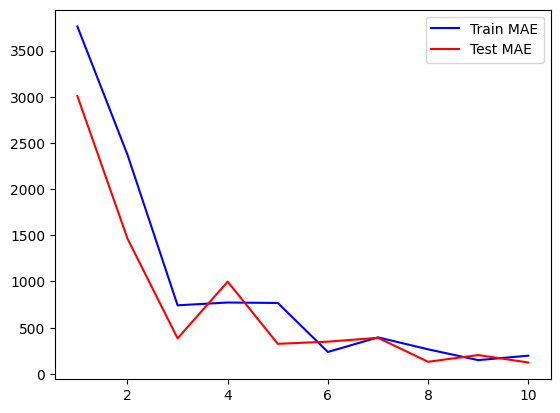

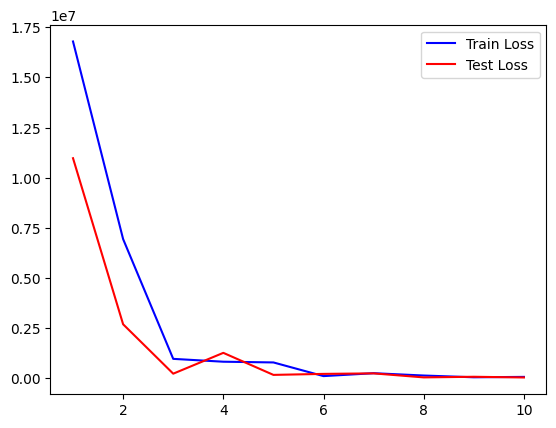

In [18]:
import matplotlib.pyplot as plt

mae2 = history0.history['mae']
val_mae = history0.history['val_mae']
loss2 = history0.history['loss']
val_loss = history0.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Model with Initializer & Regularizer

In [19]:
from keras import initializers
from keras import regularizers

In [20]:
L1=200
L2=100
L3=50

model1 = Sequential()
model1.add(Dense(L1, input_dim=13, activation ='relu', 
                 kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(L2, activation = 'relu'))
model1.add(Dense(L3, activation='relu'))

#Output Layer
model1.add(Dense(1, activation ='linear'))

In [21]:
#Compiling the Sequential Model
model1.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [22]:
#Training the model
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 1s 46ms/step - loss: 14598646.0000 - mae: 3368.8550 - val_loss: 2914862.2500 - val_mae: 1460.1675
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 1231230.5000 - mae: 861.9828 - val_loss: 1898729.3750 - val_mae: 1144.4337
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 1644841.0000 - mae: 1079.2214 - val_loss: 549509.6875 - val_mae: 634.9819
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 343154.0312 - mae: 443.5238 - val_loss: 609001.7500 - val_mae: 583.8013
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 512839.2188 - mae: 537.2398 - val_loss: 296619.6875 - val_mae: 376.8832
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 178598.1875 - mae: 320.1101 - val_loss: 185004.9844 - val_mae: 369.9555
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 179405.1406 - mae: 363.6647 - val_loss: 98106.5312 - val_mae: 

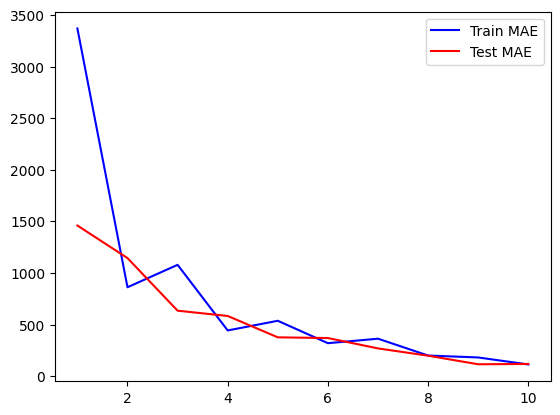

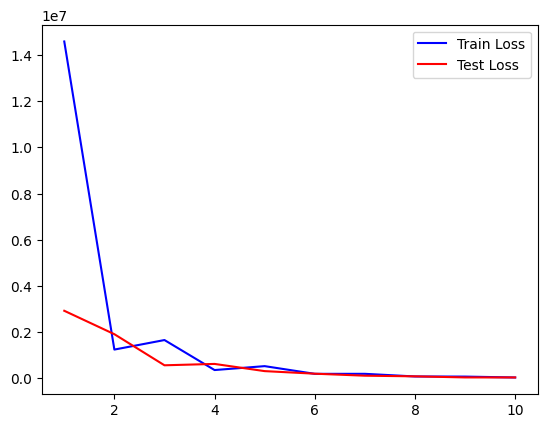

In [23]:
mae2 = history1.history['mae']
val_mae = history1.history['val_mae']
loss2 = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Dropout

In [24]:
from keras.layers import Dense, Dropout

In [25]:
L1=200
L2=100
L3=50

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu',
                   kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L2, activation= 'relu'))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L3, activation= 'relu'))
model2.add(Dropout(rate = 0.2))

#Output Layer
model2.add(Dense(1, activation ='linear'))

In [26]:
#Compiling the Sequential Model
model2.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [27]:
#Training the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 10477805.0000 - mae: 2622.1267 - val_loss: 84459.3281 - val_mae: 184.4037
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 3120746.2500 - mae: 1297.0389 - val_loss: 1207822.5000 - val_mae: 998.8401
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 2255026.7500 - mae: 1106.0540 - val_loss: 229298.7969 - val_mae: 399.3240
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 1769867.3750 - mae: 981.5537 - val_loss: 967880.9375 - val_mae: 880.3600
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 1655534.5000 - mae: 987.7680 - val_loss: 224049.2188 - val_mae: 414.9200
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 1622525.6250 - mae: 925.2198 - val_loss: 6917.9688 - val_mae: 69.2911
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 1212814.6250 - mae: 824.1265 - val_loss: 271030.0000 - val_mae: 470.

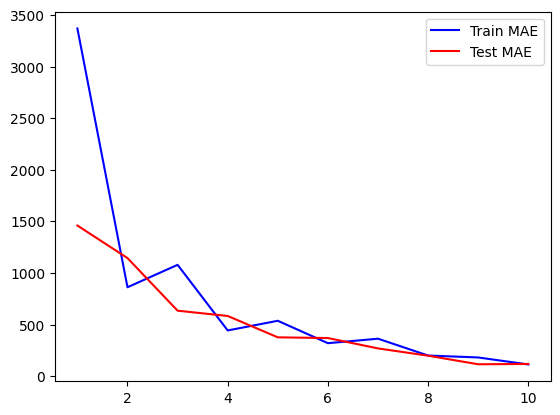

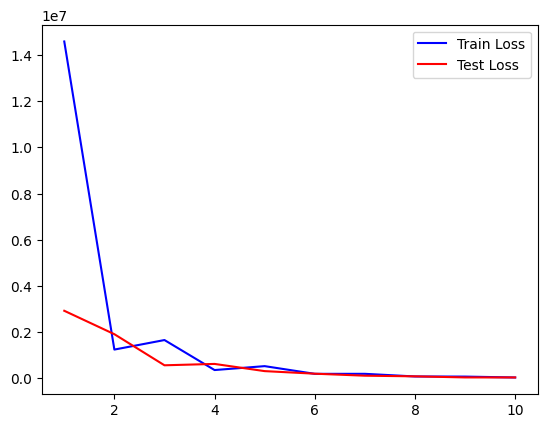

In [29]:
mae2 = history1.history['mae']
val_mae = history1.history['val_mae']
loss2 = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Early Stopping

In [30]:
from keras.callbacks import EarlyStopping

In [31]:
L1=200
L2=100
L3=50

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu',
                 kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L2, activation= 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))


#Output Layer
model3.add(Dense(1, activation ='linear'))

In [32]:
#Compiling the Sequential Model
model3.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [33]:
early_stopping_monitor = EarlyStopping(patience= 5)

#Training the model
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])

Epoch 1/20
6/6 [==============================] - 1s 40ms/step - loss: 16710951.0000 - mae: 3598.1658 - val_loss: 4484590.5000 - val_mae: 1904.5682
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 3152155.5000 - mae: 1377.2687 - val_loss: 634392.6875 - val_mae: 662.2988
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 3684909.2500 - mae: 1431.8391 - val_loss: 221575.0469 - val_mae: 410.0958
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 1965234.3750 - mae: 1059.3220 - val_loss: 677537.7500 - val_mae: 686.7401
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 1870440.7500 - mae: 989.3162 - val_loss: 892764.1875 - val_mae: 813.8602
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 1887934.8750 - mae: 1012.2661 - val_loss: 349790.0938 - val_mae: 481.3651
Epoch 7/20
6/6 [==============================] - 0s 14ms/step - loss: 1618635.7500 - mae: 949.0584 - val_loss: 92641.2734 - val_mae

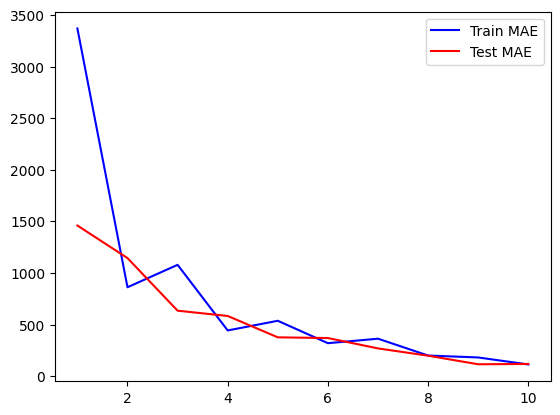

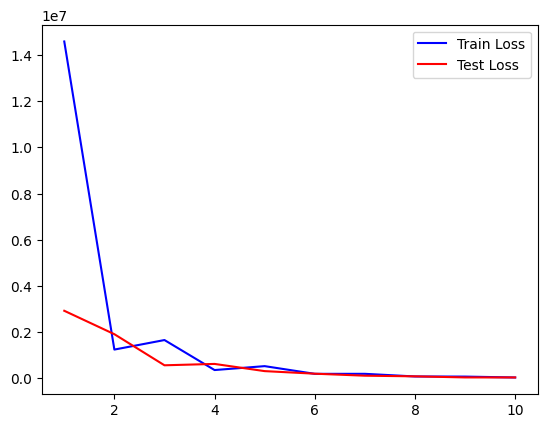

In [34]:
mae2 = history1.history['mae']
val_mae = history1.history['val_mae']
loss2 = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

## Grid Search Hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

KerasClassifier should be used when the target variable is categorical or discrete, and KerasRegressor should be used when the target variable is continuous.

Here are some examples:

KerasClassifier can be used for classification tasks such as image classification, text classification, sentiment analysis, or fraud detection where the target variable is a categorical variable.

KerasRegressor can be used for regression tasks such as predicting housing prices, stock prices, or the length of stay in a hospital where the target variable is a continuous variable.

In both cases, the Keras model needs to be appropriately designed and trained to achieve good performance on the task at hand.

In summary, the choice between KerasClassifier and KerasRegressor depends on the nature of the target variable in the problem being addressed.

In [35]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor 

In [47]:
#Function to create model
def create_model():
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 13, activation = 'relu',  
                   kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))             
  model4.add(Dense(100, activation= 'relu'))
  model4.add(Dense(50, activation= 'relu'))
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model4

## Tune the Batch Size and Epoch

In [48]:
#Create Model
model4 = KerasRegressor(model=create_model, 
                        loss = 'mse', 
                        verbose=0)

#Define the Grid Search Parameters
batch_size=[50, 100, 150, 200]
epochs = [10, 15, 20, 25]

param_grid = dict(batch_size=batch_size, 
                  epochs = epochs)

grid = GridSearchCV (estimator = model4, 
                     param_grid=param_grid, 
                     n_jobs=-1, 
                     cv=3)

grid_result = grid.fit(X_train, y_train)

In [49]:
#Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999990 using {'batch_size': 50, 'epochs': 25}
0.998063 (0.000116) with: {'batch_size': 50, 'epochs': 10}
0.999720 (0.000152) with: {'batch_size': 50, 'epochs': 15}
0.999978 (0.000027) with: {'batch_size': 50, 'epochs': 20}
0.999990 (0.000009) with: {'batch_size': 50, 'epochs': 25}
0.971485 (0.017769) with: {'batch_size': 100, 'epochs': 10}
0.997375 (0.000749) with: {'batch_size': 100, 'epochs': 15}
0.998867 (0.000883) with: {'batch_size': 100, 'epochs': 20}
0.999602 (0.000212) with: {'batch_size': 100, 'epochs': 25}
0.964089 (0.021063) with: {'batch_size': 150, 'epochs': 10}
0.987777 (0.005131) with: {'batch_size': 150, 'epochs': 15}
0.996867 (0.000524) with: {'batch_size': 150, 'epochs': 20}
0.998623 (0.000789) with: {'batch_size': 150, 'epochs': 25}
0.784296 (0.133704) with: {'batch_size': 200, 'epochs': 10}
0.947369 (0.033894) with: {'batch_size': 200, 'epochs': 15}
0.983779 (0.006384) with: {'batch_size': 200, 'epochs': 20}
0.982690 (0.015948) with: {'batch_size': 200, 'epo

#Tune the training Optimization Algorithm (only)

In [50]:
#Create Model
model5 = KerasRegressor(model = create_model,
                        loss = 'mse',
                         epochs = 25, batch_size = 50, verbose = 0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid =  dict(optimizer = optimizer)

grid2 = GridSearchCV(estimator = model5,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3)

grid_result2 = grid2.fit(X_train, y_train)

In [51]:
#Summarize result
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999994 using {'optimizer': 'Adam'}
0.999987 (0.000007) with: {'optimizer': 'SGD'}
0.999988 (0.000005) with: {'optimizer': 'RMSprop'}
0.999973 (0.000029) with: {'optimizer': 'Adagrad'}
0.999991 (0.000003) with: {'optimizer': 'Adadelta'}
0.999994 (0.000002) with: {'optimizer': 'Adam'}
0.999920 (0.000039) with: {'optimizer': 'Adamax'}
0.999972 (0.000024) with: {'optimizer': 'Nadam'}


#Tune the Neuron Activation Function

In [52]:
#Building a linear stack of layers with the sequantial model
def create_model2(activation = 'relu'):
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 13, activation = 'relu',  
                   kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))             
  model4.add(Dense(100, activation= 'relu'))
  model4.add(Dense(50, activation= 'relu'))
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'Adam')

  return model4

In [53]:
#Create Model
model6 = KerasRegressor(model = create_model2,
                        loss = 'mse',
                         epochs = 25, batch_size = 50, verbose = 0)

#Define the grid search parameters
activation = ['elu', 'selu', 'relu', 'softmax', 'tanh']

param_grid =  dict(model__activation  = activation)

grid3 = GridSearchCV(estimator = model6,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3)

grid_result3 = grid3.fit(X_train, y_train)

In [54]:
#Summarize result
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999996 using {'model__activation': 'selu'}
0.999992 (0.000005) with: {'model__activation': 'elu'}
0.999996 (0.000000) with: {'model__activation': 'selu'}
0.999984 (0.000003) with: {'model__activation': 'relu'}
0.999986 (0.000004) with: {'model__activation': 'softmax'}
0.999989 (0.000007) with: {'model__activation': 'tanh'}


#Final Model

In [56]:
#Final
modelf = Sequential()
modelf.add(Dense(200, input_dim = 13, activation = 'selu',
                 kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.01)))
modelf.add(Dense(100, activation= 'selu'))
modelf.add(Dense(50, activation= 'selu'))

#Output layer
modelf.add(Dense(1, activation= 'linear'))

#Compiling the sequantial model
modelf.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [57]:
historyf = modelf.fit(X_train, y_train, epochs =25, batch_size = 50, validation_data = (X_test, y_test))

Epoch 1/25
12/12 [==============================] - 1s 23ms/step - loss: 5093517.5000 - mae: 1747.6167 - val_loss: 1054932.2500 - val_mae: 887.8743
Epoch 2/25
12/12 [==============================] - 0s 6ms/step - loss: 666211.5625 - mae: 612.2153 - val_loss: 117447.3047 - val_mae: 275.9423
Epoch 3/25
12/12 [==============================] - 0s 7ms/step - loss: 149669.6094 - mae: 302.5143 - val_loss: 86547.4453 - val_mae: 259.8132
Epoch 4/25
12/12 [==============================] - 0s 5ms/step - loss: 28506.3457 - mae: 130.0555 - val_loss: 14834.9111 - val_mae: 92.4321
Epoch 5/25
12/12 [==============================] - 0s 5ms/step - loss: 7381.8330 - mae: 65.1372 - val_loss: 3589.8596 - val_mae: 34.8513
Epoch 6/25
12/12 [==============================] - 0s 6ms/step - loss: 2395.3848 - mae: 34.7600 - val_loss: 1759.4462 - val_mae: 35.2683
Epoch 7/25
12/12 [==============================] - 0s 7ms/step - loss: 969.5328 - mae: 23.2749 - val_loss: 456.5960 - val_mae: 15.3239
Epoch 8/25
1

<Figure size 640x480 with 0 Axes>

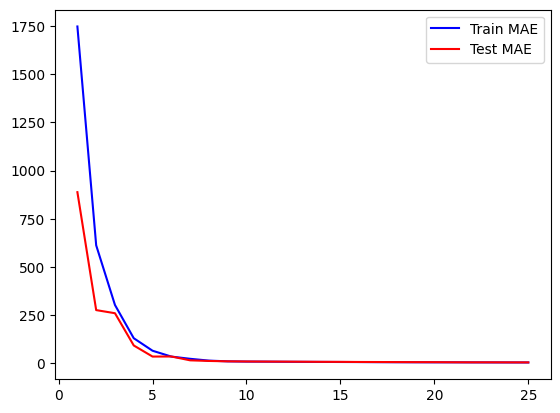

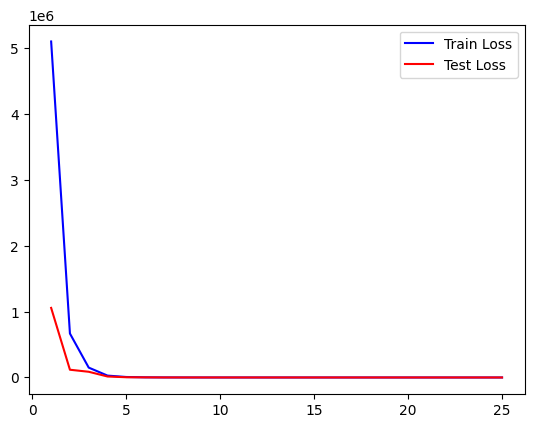

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

mae2 = historyf.history['mae']
val_mae = historyf.history['val_mae']
loss2 = historyf.history['loss']
val_loss = historyf.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()